# Install required Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# !pip install split-folders
# pip install --upgrade tensorflow
# pip install splitfolders
# pip install scikit-learn
# pip install matplotlib
# pip install pandas
# pip install seaborn
# pip install plotly

In [3]:
# pip list
# pip show pandas

In [4]:
import numpy as np
import pandas as pd
import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.optimizers import RMSprop

import matplotlib.pyplot as plt

import os
import plotly.express as px
# import splitfolders
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns

In [5]:
class_names = ['cyst', 'normal','stone', 'tumor']

base_path = '/content/drive/MyDrive/kidney_dataset/train'

cyst_path = os.path.join(base_path, 'Cyst')
normal_path = os.path.join(base_path, 'Normal')
stone_path = os.path.join(base_path, 'Stone')
tumor_path = os.path.join(base_path, 'Tumor')

cyst_count = len(os.listdir(cyst_path))
normal_count = len(os.listdir(normal_path))
stone_count = len(os.listdir(stone_path))
tumor_count = len(os.listdir(tumor_path))

print(f'Cyst count: {cyst_count}')
print(f'Normal count: {normal_count}')
print(f'Stone count: {stone_count}')
print(f'Tumor count: {tumor_count}')


Cyst count: 2967
Normal count: 4061
Stone count: 1101
Tumor count: 1826


<ipython-input-6-6a616a1fa327>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_names, y=images, palette='cubehelix')


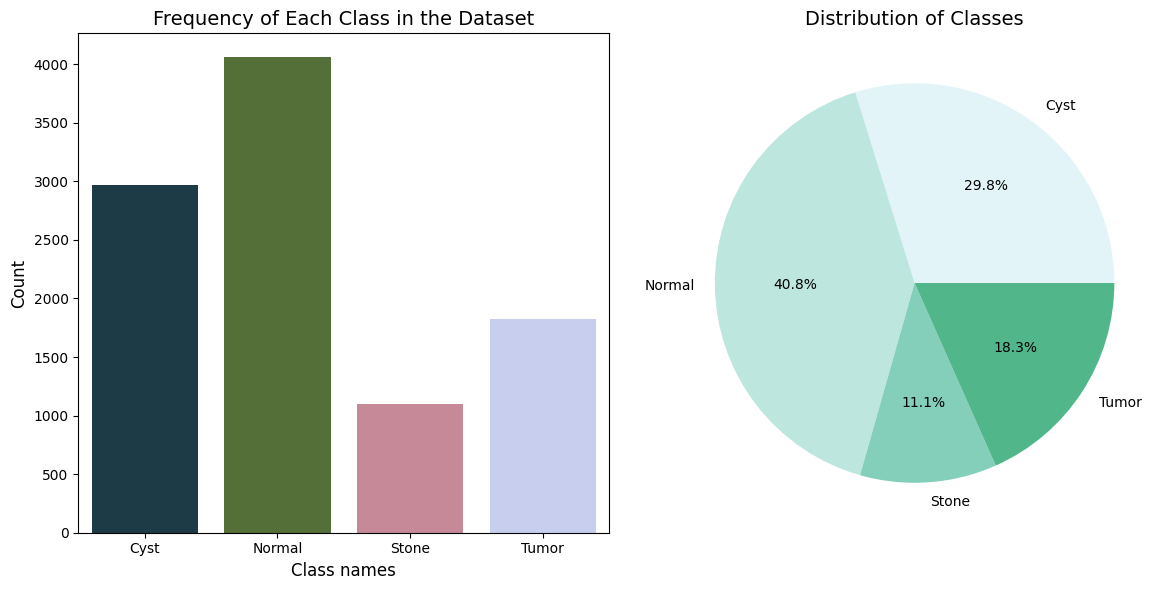

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

class_names = ['Cyst', 'Normal', 'Stone', 'Tumor']
images = [cyst_count, normal_count, stone_count, tumor_count]

plt.figure(figsize=(12, 6))

# Bar plot
plt.subplot(1, 2, 1)
sns.barplot(x=class_names, y=images, palette='cubehelix')
plt.title('Frequency of Each Class in the Dataset', fontsize=14)
plt.xlabel('Class names', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Pie chart
plt.subplot(1, 2, 2)
plt.pie(images, labels=class_names, autopct='%1.1f%%', colors=sns.color_palette('BuGn'))
plt.title('Distribution of Classes', fontsize=14)

plt.tight_layout()
plt.show()


In [ ]:
# splitfolders.ratio(
#     r"C:\Users\amrit\Desktop\desktop_complete\abhinav_kidney_project\kidneyDisease-Pred\CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone",
#    output="./dataset",
#    ratio=(.8,.1,.1)
# )

In [7]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)
val = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory('/content/drive/MyDrive/kidney_dataset/train',
                                          target_size=(180, 180),
                                          color_mode='grayscale',
                                          class_mode = 'categorical',
                                          batch_size=64
                                         )

test_dataset = test.flow_from_directory('/content/drive/MyDrive/kidney_dataset/test',
                                        target_size=(180, 180),
                                        color_mode='grayscale',
                                        class_mode = 'categorical',
                                        batch_size=64,
                                        shuffle = False
                                       )

valid_dataset = val.flow_from_directory('/content/drive/MyDrive/kidney_dataset/val',
                                        target_size=(180, 180),
                                        color_mode='grayscale',
                                        class_mode = 'categorical',
                                        batch_size=64
                                       )

Found 9955 images belonging to 4 classes.
Found 1249 images belonging to 4 classes.
Found 1242 images belonging to 4 classes.


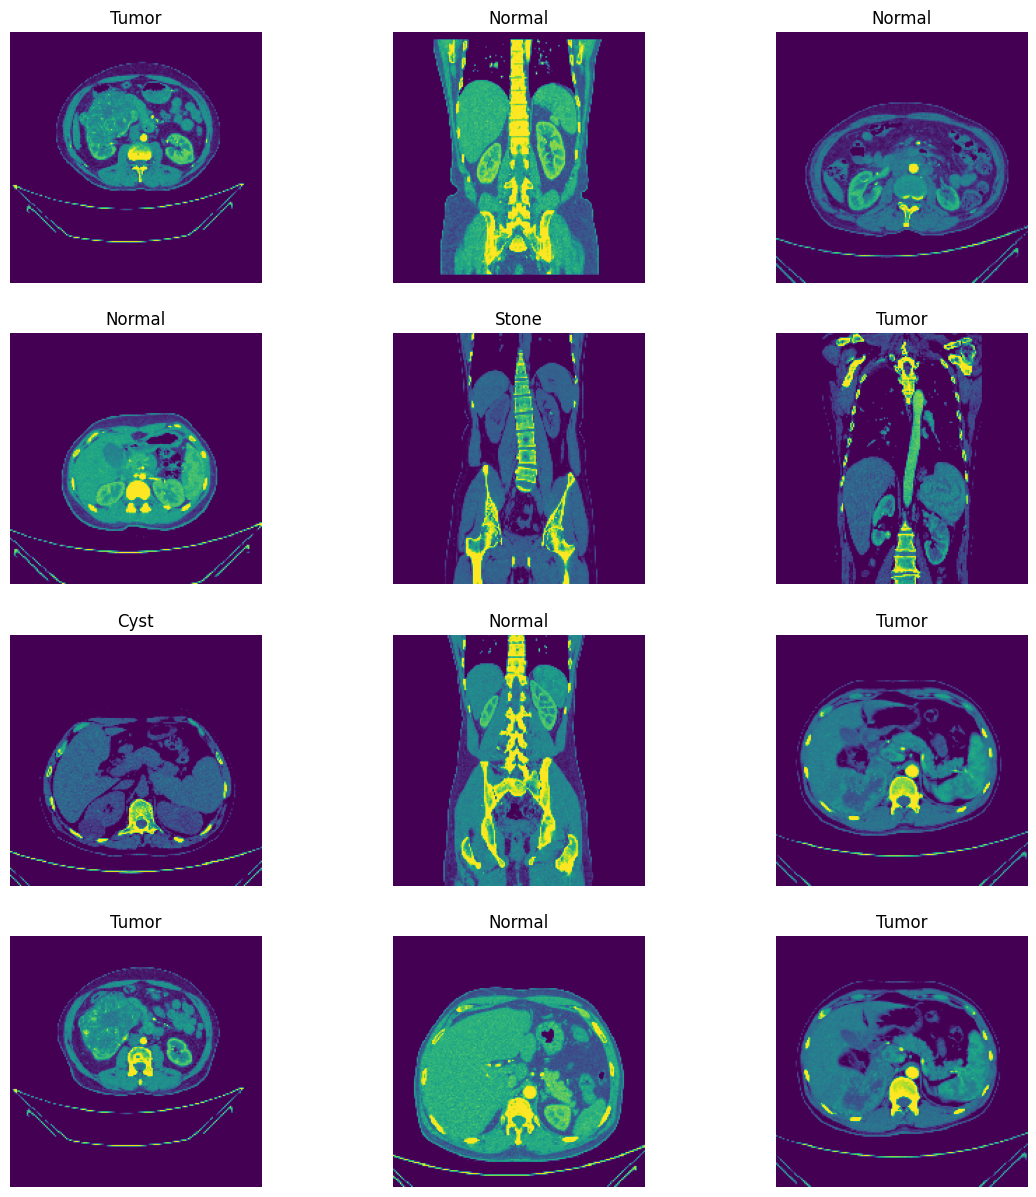

In [8]:
import numpy as np
import matplotlib.pyplot as plt

class_names = ['Cyst', 'Normal', 'Stone', 'Tumor']

def class_type(dataset, n_images):
    i = 1

    for images, labels in dataset:
        labels = labels.astype('int32')

        plt.figure(figsize=(14, 15))

        for image, label in zip(images, labels):
            plt.subplot(4, 3, i)
            plt.imshow(image)
            plt.title(class_names[np.argmax(label)])
            plt.axis('off')
            i += 1
            if i > n_images:
                break
        plt.show()
        break  # Only display one batch of images

class_type(train_dataset, 12)


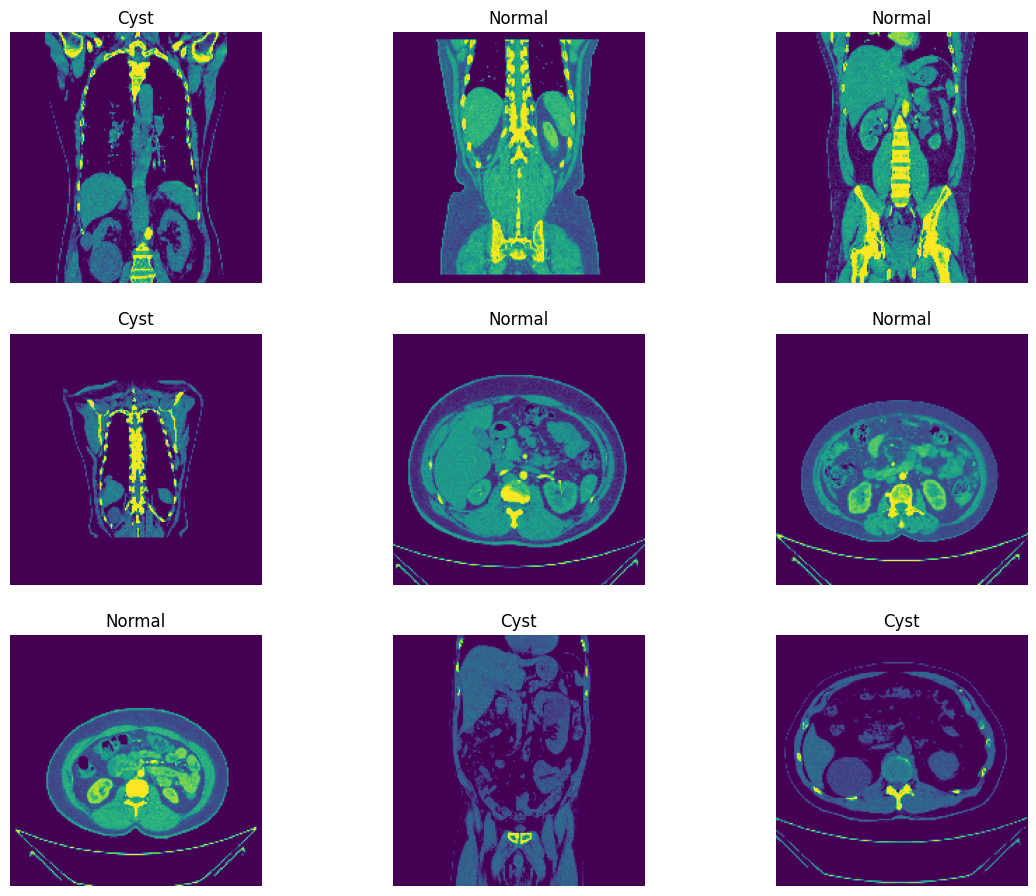

In [9]:
class_names = ['Cyst', 'Normal', 'Stone', 'Tumor']
def class_type(dataset, n_images):

    i = 1
    images, labels = next(dataset)  # change here
    labels = labels.astype('int32')

    plt.figure(figsize=(14, 15))

    for image, label in zip(images, labels):
        plt.subplot(4, 3, i)
        plt.imshow(image)
        plt.title(class_names[np.argmax(label)])
        plt.axis('off')
        i += 1
        if i == n_images:
            break
    plt.show()
class_type(train_dataset, 10)


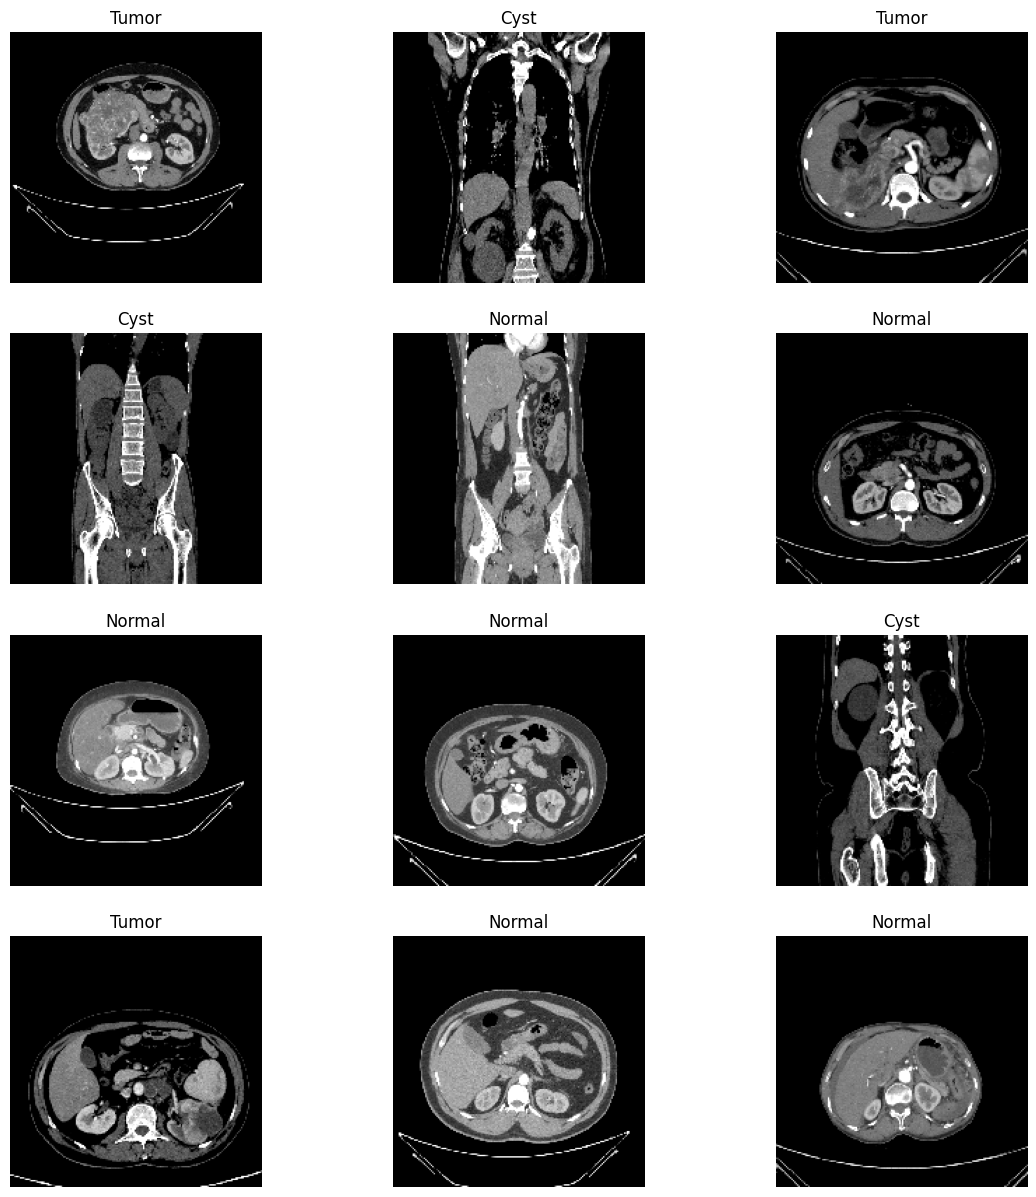

In [11]:
import matplotlib.pyplot as plt

class_names = ['Cyst', 'Normal', 'Stone', 'Tumor']

def class_type(dataset, n_images):
    plt.figure(figsize=(14, 15))

    for i in range(n_images):
        image, label = dataset[i]
        plt.subplot(4, 3, i+1)
        plt.imshow(image[0], cmap='gray')  # Assuming images are grayscale
        plt.title(class_names[np.argmax(label[0])])
        plt.axis('off')

    plt.show()

# Example usage:
class_type(train_dataset, 12)


In [12]:
inputs = keras.Input(shape=(180,180,1))
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dense(512,activation='relu')(x)
outputs = layers.Dense(4, activation='softmax')(x)
model = keras.Model(inputs = inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 176, 176, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 88, 88, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 86, 86, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 84, 84, 128)       73856     
                                                             

In [ ]:
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy',
                                                                                   keras.metrics.Precision(name='precision'),
                                                                                   keras.metrics.Recall(name='recall')])
history = model.fit(train_dataset,
          validation_data=valid_dataset,
          epochs=3
         )


Epoch 1/3
 27/156 [====>.........................] - ETA: 1:05:49 - loss: 1.3057 - accuracy: 0.3961 - precision: 0.6162 - recall: 0.0359

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [ ]:
predictions = model.predict(test_dataset)
model.evaluate(test_dataset)

20/20 [==============================] - 8s 385ms/step - loss: 0.0160 - accuracy: 0.9968 - precision: 0.9968 - recall: 0.9960


[0.01595892570912838,
 0.9967974424362183,
 0.9967948794364929,
 0.9959967732429504]

In [ ]:
def class_prediction(dataset, n_images):
    i = 1
    # Iterate over the dataset to get images and labels
    for images, labels in dataset:
        preds = model.predict(images)
        predictions = np.argmax(preds, axis=1)
        labels = np.argmax(labels, axis=1)
        plt.figure(figsize=(14, 15))
        for image, label, prediction in zip(images, labels, predictions):
            plt.subplot(4, 3, i)
            plt.imshow(image)
            if prediction == label:
                title_obj = plt.title(class_names[label])
                plt.setp(title_obj, color='g')
                plt.axis('off')
            else:
                title_obj = plt.title(class_names[label])
                plt.setp(title_obj, color='r')
                plt.axis('off')
            i += 1
            if i == n_images:
                break
        plt.show()
        if i == n_images:
            break

# Call the function with your test dataset and number of images to display
class_prediction(test_dataset, 10)


Accuracy: 0.9967974379503602
Precision: 0.9963577271449435
Recall: 0.9946391316303205
F1_score: 0.9954933228440844


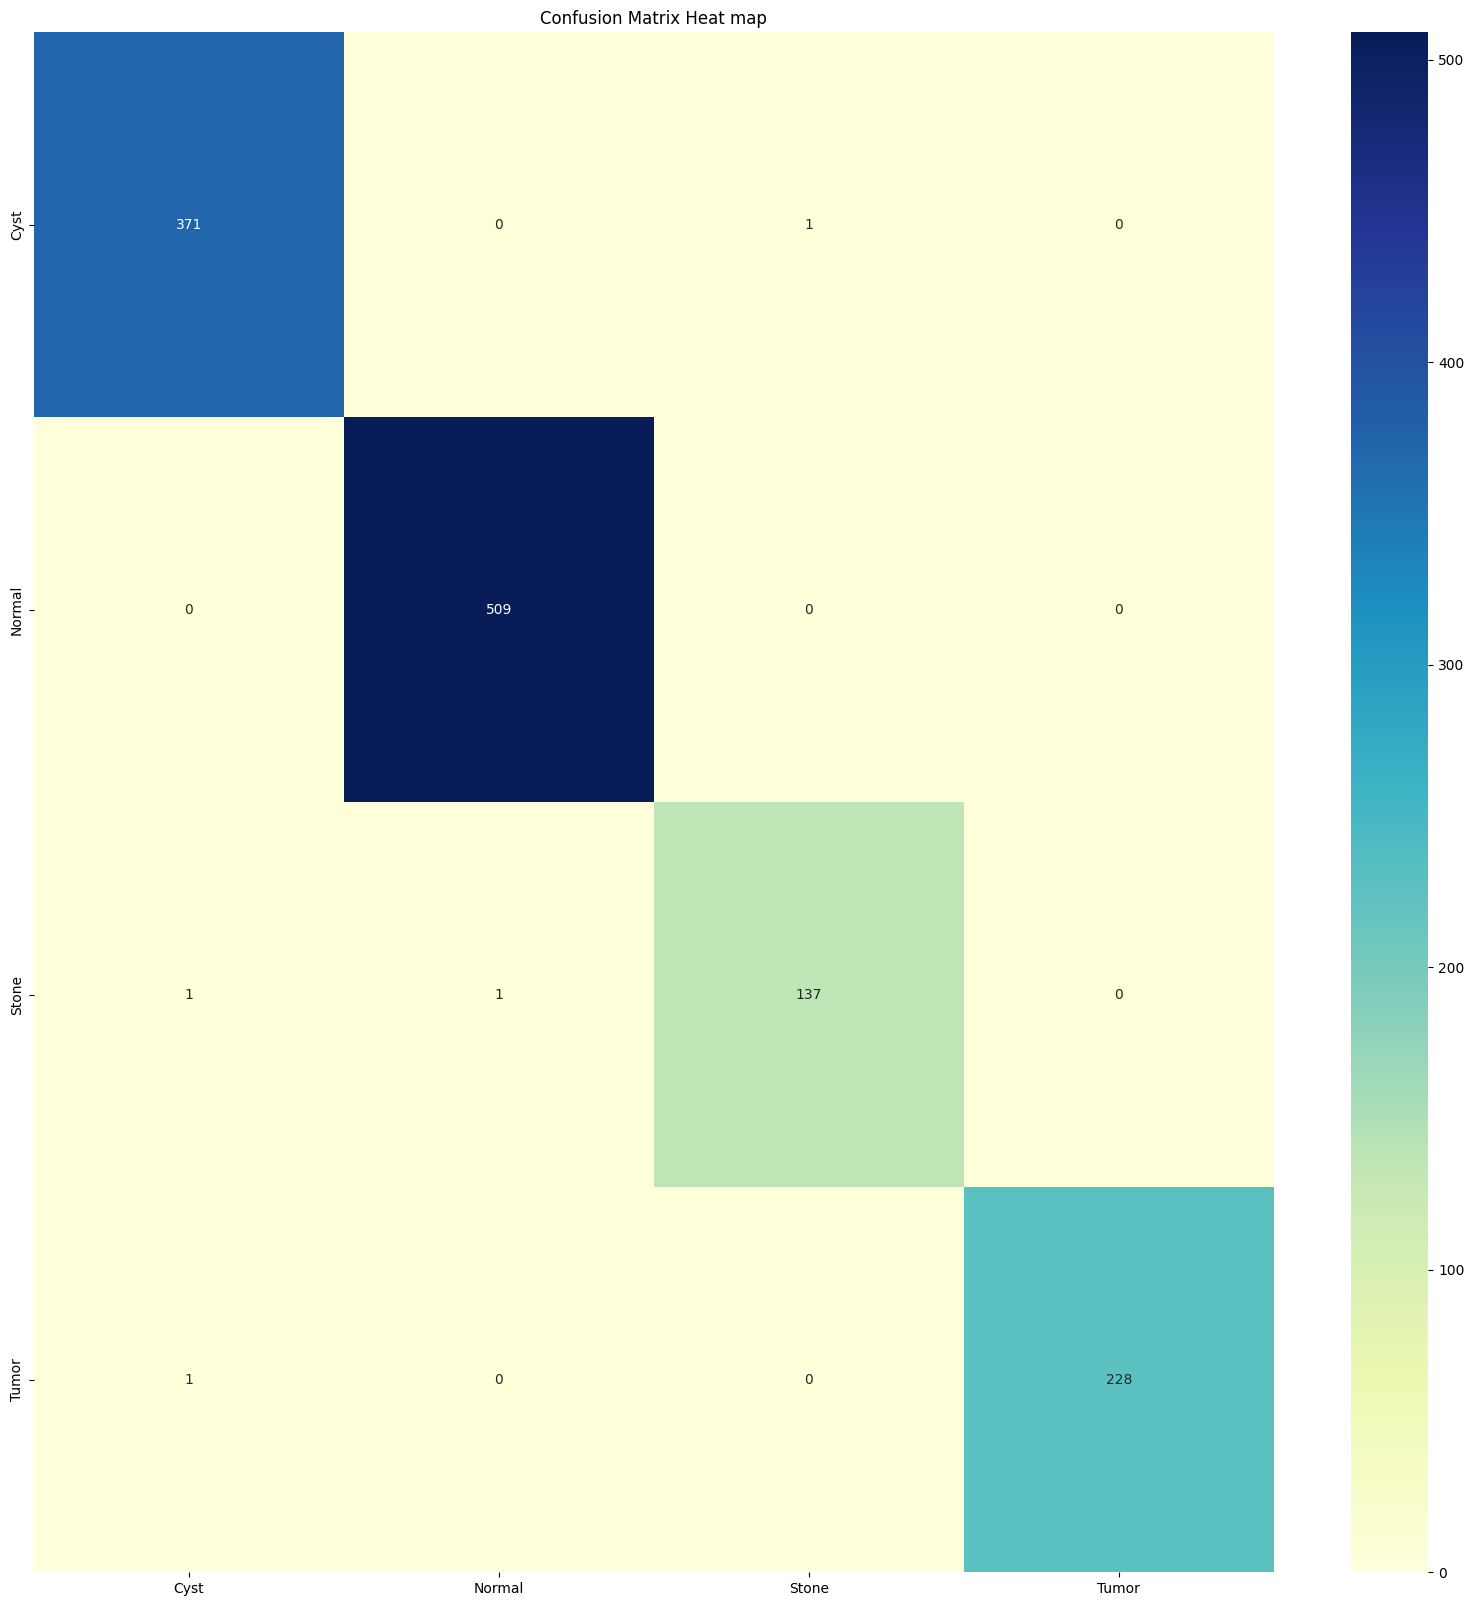

In [ ]:
diseases_labels = []

for key, value in train_dataset.class_indices.items():
   diseases_labels.append(key)

def evaluate(actual, predictions):
  pre = []
  for i in predictions:
    pre.append(np.argmax(i))

  accuracy = (pre == actual).sum() / actual.shape[0]
  print(f'Accuracy: {accuracy}')
  precision, recall, f1_score, _ = precision_recall_fscore_support(actual, pre, average='macro')
  print(f'Precision: {precision}')
  print(f'Recall: {recall}')
  print(f'F1_score: {f1_score}')

  fig, ax = plt.subplots(figsize=(20,20))
  conf_mat = confusion_matrix(actual, pre)
  sns.heatmap(conf_mat, annot=True, fmt='.0f', cmap="YlGnBu", xticklabels=diseases_labels, yticklabels=diseases_labels).set_title('Confusion Matrix Heat map')
  plt.show()

evaluate(test_dataset.classes, predictions)


In [ ]:
from tensorflow.keras.models import load_model
model.save('KD_Model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
MODEL_PATH = 'KD_Model.h5'
model2 = load_model(MODEL_PATH)

In [ ]:
import numpy as np
import cv2

def predict_image(image_path):
    # Load the image in grayscale mode
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Resize the image to the target size
    img = cv2.resize(img, (180, 180))

    img_array = np.array(img, dtype=np.float32)  # Convert the array to float32
    img_array = np.expand_dims(img_array, axis=0)
    img_array = np.expand_dims(img_array, axis=-1)  # Add an extra dimension for the grayscale channel
    img_array /= 255.0  # Normalize the image

    # Make prediction
    prediction = model2.predict(img_array)
    predicted_label = np.argmax(prediction)

    return predicted_label


In [ ]:
# image_path = '/content/drive/MyDrive/kidney_dataset/test/Tumor/Tumor- (1264).jpg'
image_path='/content/drive/MyDrive/kidney_dataset/val/Stone/Stone- (1188).jpg'
predicted_label = predict_image(image_path)
print("Predicted Label:", class_names[predicted_label])

1/1 [==============================] - 0s 93ms/step
Predicted Label: Stone
